# LU5 - Basic Statistics: Learning notebooks

In this notebook we will cover the following:
 - Mode
 - Mean
 - Median
 - Variance
 - Standard Deviation
 - Quantiles
 - Uniques
 - Frequency tables
 - Summarize
 - Argmax


Some imports to help us 

In [1]:
from pydataset import data # this is just to get some datasets
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from utils import plot_mean_vs_median_hist, prepare_dataset

### Some context

Let's have a look at the some legos to understand how some of this concepts can help us

In [3]:
lego = pd.read_csv('data/sets.csv')

In [4]:
lego.shape # we are dealing with something that starts to be big

(11673, 5)

Here's some metadata about the dataset

![meta](data/metadata.png)

In [6]:
lego.head()  # let's have a look at the first lines of the dataframe

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


> Here we can start using some basic statistics to help us understand our dataset. We will go one by one and try to have an intuition for when it's best to use each one 

## Mode

> We can start by asking: What is the year that had more sets published?

For this we can use the `mode`. The mode is just the most frequent number in a set. 

In [7]:
lego.year.mode()     # seems like 2014 was the year where more sets were published

0    2014
dtype: int64

In pandas, the documentation for the `mode` is: Gets the mode(s) of each element along the axis selected. Adds a row for each mode per label, fills in gaps with nan. This means we can do this for non-numerical data as well. 

In [8]:
lego.name.mode()     #  this returns the most frequent name in the column name

0    Basic Building Set
dtype: object

# Mean and Median

As a kid I remember the more number of parts the better. What is the average number of parts in the sets of legos now?

To answer this question we can check the mean and median and try to understand that difference between them. 

> #### Mean: sum all the values and divide by the number of values that exists. 

![mean](https://classconnection.s3.amazonaws.com/258/flashcards/4553258/png/sample_mean_formula-1430DFD699B7A70F795-thumb400.png)


In [9]:
lego.num_parts.mean()    # In terms of code, it's as simple as this. We have an avearge of 162 numbers of parts

162.26240041120533

> #### Median: This is a bit more tricky the way to do it depends on the number of observations being odd or even

![median](https://www.onlinemathlearning.com/image-files/xmedian.png.pagespeed.ic.IbKdiN29Yk.png)

In [10]:
lego.num_parts.median()  # Wow the median is quite different! 45 parts only.. we have some big sets in there

45.0

So when should we use each one of them? 

* The median may be a better indicator of the most typical value if a set of scores has an outlier. An outlier is an extreme value that differs greatly from other values. Usually for 

* As the data becomes skewed the mean loses its ability to provide the best central location for the data because the skewed data is dragging it away from the typical value. However, the median best retains this position and is not as strongly influenced by the skewed values.

* However, when the sample size is large and does not include outliers, the mean score usually provides a better measure of central tendency.

* See the example below: 
    * Yellow: median
    * red: mean

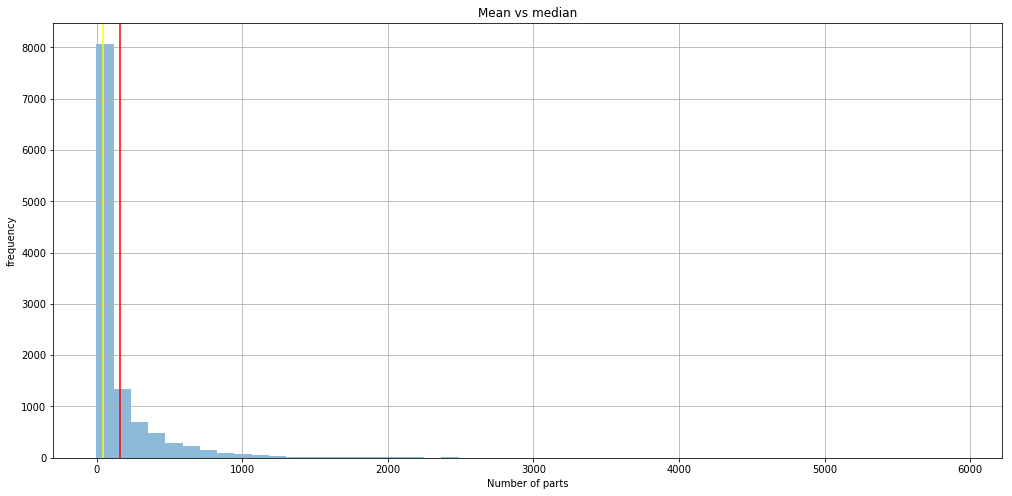

In [11]:
plot_mean_vs_median_hist(lego)

In [12]:
lego.num_parts.mean()

162.26240041120533

In [13]:
lego.num_parts.median()

45.0

Ok so we have some indication that we should look a bit more for this.. Mean and Median being so different is an indication of either outliers of skewed distributions. So far we have been looking at centrality measures. Now let's look at dispersion, to understand how "spread" our data is

## Standard Deviation and Variance

The standard deviation is a numerical value used to indicate how widely individuals in a group vary. If individual observations vary greatly from the group mean, the standard deviation is big; and vice versa.

It is important to distinguish between the standard deviation of a population and the standard deviation of a sample. They have different notation, and they are computed differently. The standard deviation of a population is denoted by `σ` and the standard deviation of a sample, by `s`.

The standard deviation is equal to the square root of the variance.

As you can see below, the variance it's not so intuitive. This is because it's expressed in different units that the mean and it becomes harder for us to understand the dispersion

In [14]:
lego.num_parts.var()

109026.82824430607

The standard deviation on the other hand it's more intuitive as we can compare it to the mean

In [15]:
lego.num_parts.std()

330.19210808907303

## Quantiles

A quantile defines a particular part of a data set, i.e. a quantile determines how many values in a distribution are above or below a certain limit. Special quantiles are the quartile (quarter), the quintile (fifth) and percentiles (hundredth).

Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.

Note the relationship between quartiles and percentiles. Q1 corresponds to P25, Q2 corresponds to P50, Q3 corresponds to P75. Q2 is the median value in a set of data.

![quantiles](https://www.onlinemathlearning.com/image-files/median-quartiles.png)

In [16]:
quartiles = [.25, .5, .75]
lego.num_parts.quantile(q=quartiles)

0.25     10.0
0.50     45.0
0.75    172.0
Name: num_parts, dtype: float64

We know that 75% of our sets have less than 172 num of parts. Here we can see why it's simple and useful to use quartiles vs mean. Remember the `mean = 162`. One can also look at the Interquartile Range, that basically show us the range where the "middle fifty" is.

## Summarizing

As usual, pandas has something extremely helpeful. It's the `describe` method. It gives you a summary of what you variable looks like. It's an easy to have a look and to spot some things you might explore later on.

In [17]:
lego.num_parts.describe()

count    11673.000000
mean       162.262400
std        330.192108
min         -1.000000
25%         10.000000
50%         45.000000
75%        172.000000
max       5922.000000
Name: num_parts, dtype: float64

So we have a number of parts with `-1` 

> Because we have too many parts and year, let's aggregate into two new columns: Column `before_millenium` that indicates if the set was produced before 2000 or after. Another column is `size_set`. This will show us if a set is big, if the number of parts is `> 100 ` or small otherwise.

`prepare_dataset()` does this for us.

In [18]:
lego = prepare_dataset(lego)

In [19]:
lego.head()

,set_num,name,year,theme_id,num_parts,before_millenium,size_set
0,00-1,Weetabix Castle,1970,414,471,1,big set
1,0011-2,Town Mini-Figures,1978,84,12,1,small set
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,1,small set
3,0012-1,Space Mini-Figures,1979,143,12,1,small set
4,0013-1,Space Mini-Figures,1979,143,12,1,small set


We want to see how the sizes changed before and after the millenium. To do this, we have something that is called a frequency table. 

Frequency tables are the frequency counts of categorical variables. 

Pandas provides us with `pd.crosstab` which is a simple way to create different levels of frequency tables. Let's see what this means:

In [20]:
pd.crosstab(index=lego['size_set'], columns=lego['before_millenium'])

before_millenium,0,1
size_set,,
big set,2753,1145
small set,5256,2519


Now we have a table that show us the counts of the sets before and after the millenium and their respective size. We can include an argument that is `margins=True` to have the sum of rows and columns. This can be extremely useful when we start taking some conclusion from this data.

In [21]:
pd.crosstab(index=lego['size_set'], columns=lego['before_millenium'], margins=True)

before_millenium,0,1,All
size_set,,,
big set,2753,1145,3898
small set,5256,2519,7775
All,8009,3664,11673


One really cool thing about `pd.crosstab()` is that we can have high dimensional tables

In [22]:
pd.crosstab(index=lego['name'], columns=[lego['size_set'], lego['before_millenium']])

size_set                                                                        big set  \
before_millenium                                                                      0   
name                                                                                      
 1 stud Blue Storage Brick                                                            0   
 Scenery and Dagger Trap polybag                                                      0   
 Spectre                                                                              0   
 White Spaceman Key Chain                                                             0   
'Where Are My Pants?' Guy                                                             0   
1 stud Red Storage Brick                                                              0   
1 x 1 Bricks                                                                          0   
1 x 1 Bricks with Letters (System)                                                    0   
1 x 1 Bricks with Numbers (System)                                                    0   
1 x 1 Round Bricks                                                                    0   
1 x 1 and 1 x 2 Plates (cardboard box version)                                        0   
1 x 1 and 1 x 2 Plates - Black (architectural hobby und modelbau version)             0   
1 x 1 and 1 x 2 Plates - Blue (architectural hobby und modelbau version)              0   
1 x 1 and 1 x 2 Plates - Light Gray (architectural hobby und modelbau version)        0   
1 x 1 and 1 x 2 Plates - Red (architectural hobby und modelbau version)               0   
1 x 1 and 1 x 2 Plates - Trans-Clear (architectural hobby und modelbau version)       0   
1 x 1 and 1 x 2 Plates - White (architectural hobby und modelbau version)             0   
1 x 1 and 1 x 2 Plates - Yellow (architectural hobby und modelbau version)            0   
1 x 1 x 1 Window Frame                                                                0   
1 x 1 x 1 Window, Red or White                                                        0   
1 x 1 x 2 Window Frame                                                                0   
1 x 1 x 2 Window, Red or White                                                        0   
1 x 1, 1 x 2, 1 x 4, 1 x 6, 1 x 8 Bricks                                              0   
1 x 1, 1 x 2, 2 x 2, 2 x 3, 2 x 4 Plates (System)                                     0   
1 x 10 Beams                                                                          0   
1 x 12 Beams                                                                          0   
1 x 16 Beams                                                                          0   
1 x 2 Beams                                                                           0   
1 x 2 Blue Plates (Pack of 100)                                                       0   
1 x 2 Brick Dark Gray                                                                 0   
1 x 2 Brick Light Gray                                                                0   
1 x 2 Brick Tan                                                                       0   
1 x 2 Bricks                                                                          0   
1 x 2 Brown Bricks                                                                    0   
1 x 2 Plate with Slides (Pack of 100)                                                 0   
1 x 2 Red Bricks (Pack of 50)                                                         0   
1 x 2 Sand Red Bricks                                                                 0   
1 x 2 and 3 x 2 Sloping Bricks, Blue                                                  0   
1 x 2 and 3 x 2 Sloping Bricks, Red                                                   0   
1 x 2 x 1 Window Frame                                                                0   
1 x 2 x 1 Window, Red or White                                                        0

## Unique

But wait... before and after the millenium? How many year are in this data set exactly? One interesting thing is the `unique()` method. It gives us the unique values in a Series. 

Let's see the what are the years that we have in our dataset: 

In [23]:
lego.year.unique()

array([1970, 1978, 1987, 1979, 1976, 1965, 1985, 1968, 1999, 1967, 1969,
       2001, 1966, 2003, 2002, 2004, 2006, 2005, 2010, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 1977, 1983, 1986, 1984,
       1973, 1981, 2000, 1980, 1982, 1988, 1997, 1998, 1971, 1955, 1956,
       1957, 1958, 1974, 1972, 1975, 1992, 1991, 1989, 1990, 1993, 1994,
       1996, 1995, 1959, 1962, 1961, 1960, 1963, 1964, 1950, 1953, 1954])

Just as an example, as we know which are the uniques becase we created them, we can see the uniques in the size dataset

In [24]:
lego.size_set.unique()

array(['big set', 'small set'], dtype=object)

What is the position of the maximum values? We have `argmax()` to tell us the first index of the maximum value of an array. This can be useful if you want to do something with the maximum value and you need to automatically understand where it is. 

** Position of the maximum value **

So we know the index is 170 for the maximum value of number of parts

In [25]:
lego.num_parts.idxmax()

170

How much is that value? 

In [26]:
lego.num_parts.max()

5922

Let's have a look at the part of the dataset where that value is. Pay close attention to the index and the value at num_parts

In [27]:
lego[160:180]

,set_num,name,year,theme_id,num_parts,before_millenium,size_set
160,10178-1,Motorized Walking AT-AT,2007,169,1137,0,big set
161,10179-1,Millennium Falcon - UCS,2007,174,5195,0,big set
162,10181-1,Eiffel Tower 1:300 Scale,2007,276,3428,0,big set
163,10182-1,Cafe Corner,2007,155,2058,0,big set
164,10183-1,Hobby Train,2007,397,1080,0,big set
165,10184-1,Town Plan,2008,104,2017,0,big set
166,10185-1,Green Grocer,2008,155,2358,0,big set
167,10186-1,General Grievous,2008,173,1084,0,big set
168,10187-1,Volkswagen Beetle (VW Beetle),2008,276,1625,0,big set
169,10188-1,Death Star,2008,174,3807,0,big set
